In [1]:
#基本库
import pandas as pd
import numpy as np
import random as rnd
import os
import pickle
import random
import math

# 可视化
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 消除警告
import warnings
warnings.filterwarnings('ignore')

# 机器学习模型
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer,accuracy_score 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression # 逻辑回归模型
from sklearn.svm import SVC,LinearSVC # 线性分类支持向量机
from sklearn.ensemble import RandomForestClassifier # 随机森林分类模型
from sklearn.neighbors import KNeighborsClassifier # K近邻分类模型
from sklearn.naive_bayes import GaussianNB # 贝叶斯分类模型
from sklearn.linear_model import Perceptron # 感知机模型
from sklearn.linear_model import SGDClassifier # 梯度下降算法
from sklearn.tree import DecisionTreeClassifier # 决策树模a型
from sklearn.model_selection import KFold # K-fold

In [2]:
import jupyter_ai
%reload_ext jupyter_ai_magics
%reload_ext dotenv
%dotenv /root/key.env
%ai list

cannot find .env file


| Provider | Environment variable | Set? | Models |
|----------|----------------------|------|--------|
| `ai21` | `AI21_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | `ai21:j1-large`, `ai21:j1-grande`, `ai21:j1-jumbo`, `ai21:j1-grande-instruct`, `ai21:j2-large`, `ai21:j2-grande`, `ai21:j2-jumbo`, `ai21:j2-grande-instruct`, `ai21:j2-jumbo-instruct` |
| `bedrock` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | `bedrock:amazon.titan-tg1-large`, `bedrock:anthropic.claude-v1`, `bedrock:anthropic.claude-instant-v1`, `bedrock:anthropic.claude-v2`, `bedrock:ai21.j2-jumbo-instruct`, `bedrock:ai21.j2-grande-instruct` |
| `anthropic` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | `anthropic:claude-v1`, `anthropic:claude-v1.0`, `anthropic:claude-v1.2`, `anthropic:claude-2`, `anthropic:claude-instant-v1`, `anthropic:claude-instant-v1.0` |
| `azure-chat-openai` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | This provider does not define a list of models. |
| `cohere` | `COHERE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | `cohere:medium`, `cohere:xlarge` |
| `gpt4all` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | `gpt4all:ggml-gpt4all-j-v1.2-jazzy`, `gpt4all:ggml-gpt4all-j-v1.3-groovy`, `gpt4all:ggml-gpt4all-l13b-snoozy` |
| `huggingface_hub` | `HUGGINGFACEHUB_API_TOKEN` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | See https://huggingface.co/models for a list of models. Pass a model's repository ID as the model ID; for example, `huggingface_hub:ExampleOwner/example-model`. |
| `openai` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | `openai:text-davinci-003`, `openai:text-davinci-002`, `openai:text-curie-001`, `openai:text-babbage-001`, `openai:text-ada-001`, `openai:davinci`, `openai:curie`, `openai:babbage`, `openai:ada` |
| `openai-chat` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | `openai-chat:gpt-3.5-turbo`, `openai-chat:gpt-3.5-turbo-16k`, `openai-chat:gpt-3.5-turbo-0301`, `openai-chat:gpt-3.5-turbo-0613`, `openai-chat:gpt-3.5-turbo-16k-0613`, `openai-chat:gpt-4`, `openai-chat:gpt-4-0314`, `openai-chat:gpt-4-0613`, `openai-chat:gpt-4-32k`, `openai-chat:gpt-4-32k-0314`, `openai-chat:gpt-4-32k-0613` |
| `openai-chat-new` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | `openai-chat-new:gpt-3.5-turbo`, `openai-chat-new:gpt-3.5-turbo-16k`, `openai-chat-new:gpt-3.5-turbo-0301`, `openai-chat-new:gpt-3.5-turbo-0613`, `openai-chat-new:gpt-3.5-turbo-16k-0613`, `openai-chat-new:gpt-4`, `openai-chat-new:gpt-4-0314`, `openai-chat-new:gpt-4-0613`, `openai-chat-new:gpt-4-32k`, `openai-chat-new:gpt-4-32k-0314`, `openai-chat-new:gpt-4-32k-0613` |
| `sagemaker-endpoint` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify an endpoint name as the model ID. In addition, you must include the `--region_name`, `--request_schema`, and the `--response_path` arguments. For more information, see the documentation about [SageMaker endpoints deployment](https://docs.aws.amazon.com/sagemaker/latest/dg/realtime-endpoints-deployment.html) and about [using magic commands with SageMaker endpoints](https://jupyter-ai.readthedocs.io/en/latest/users/index.html#using-magic-commands-with-sagemaker-endpoints). |

Aliases and custom commands:

| Name | Target |
|------|--------|
| `gpt2` | `huggingface_hub:gpt2` |
| `gpt3` | `openai:text-davinci-003` |
| `chatgpt` | `openai-chat:gpt-3.5-turbo` |
| `gpt4` | `openai-chat:gpt-4` |
| `titan` | `bedrock:amazon.titan-tg1-large` |


In [3]:
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=998244353)
path = './data/zhongyi/'
x_train = pd.read_csv(path+'train_data.csv')
y_train = pd.read_csv(path+'train_label.csv')
x_test = pd.read_csv(path+'test_data.csv')
y_test = pd.read_csv(path+'test_label.csv')

In [4]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1137, 536), (1137, 10), (284, 536), (284, 10))

In [5]:
train_df = pd.concat([x_train, y_train],axis=1) #先将字段全并在一起
train_df.head()

,commonXingb,commonNl,commonSg,commonTz,commonStFz,commonQx,commonQxYn,commonSm,commonSmRskn,commonSmYx,...,commonDiseaseCode,commonTzPhz,commonTzQxz,commonTzYaxz,commonTzYixz,commonTzTsz,commonTzSrz,commonTzXyz,commonTzQyz,commonTzTbz
0,0,0.629630,0.890244,0.505882,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0.864198,0.829268,0.270588,0,0,0,1,1,1,...,0,1,0,0,0,0,0,0,0,0
2,1,0.802469,0.878049,0.305882,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0.617284,0.756098,0.270588,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0.493827,0.682927,0.435294,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [6]:
# 用seaborn的heatmap对特征之间的相关性进行可视化
# 这个地方得跑很久
'''
train_df.head()
colormap = plt.cm.RdBu
plt.figure(figsize=(100,80))
plt.title('Pearson Correlation of Features',y=1.05,size=15)
sns.heatmap(train_df.astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True,cmap=colormap,linecolor='white',annot=True)
sns.set(font_scale=0.6)
plt.show()
'''

"\ntrain_df.head()\ncolormap = plt.cm.RdBu\nplt.figure(figsize=(100,80))\nplt.title('Pearson Correlation of Features',y=1.05,size=15)\nsns.heatmap(train_df.astype(float).corr(),linewidths=0.1,vmax=1.0,\n            square=True,cmap=colormap,linecolor='white',annot=True)\nsns.set(font_scale=0.6)\nplt.show()\n"

# PCA降维
546个字段的数据集我们是很难在热图中挖掘主要特征的，
所以我们需要先对数据集进行降维，采用先采用PCA方法

In [7]:
# pca 降维
from sklearn.decomposition import PCA

def PCA_process(data,pre,n):
    pca = PCA(n_components = n)
    new_data = pca.fit_transform(data)
    new_data = pd.DataFrame(new_data,columns = [f'{pre}{i+1}' for i in range(n)])
    return new_data
    
pca_x_train = PCA_process(x_train,'x',400)
#pca_y_train = PCA_process(y_train,'y',10)
train_df = pd.concat([pca_x_train, y_train],axis=1) #先将字段全并在一起
train_df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,commonDiseaseCode,commonTzPhz,commonTzQxz,commonTzYaxz,commonTzYixz,commonTzTsz,commonTzSrz,commonTzXyz,commonTzQyz,commonTzTbz
0,-0.396724,-1.395506,-0.795384,-0.534592,-1.159966,1.914106,0.381865,1.708386,-1.774907,-0.573568,...,0,0,1,0,0,0,0,0,0,0
1,-2.182196,-1.272119,-1.219480,1.927462,-0.434386,1.074657,-0.647708,-0.630207,0.465349,0.249802,...,0,1,0,0,0,0,0,0,0,0
2,-3.536376,0.298470,-0.816889,-0.288536,-0.754158,-0.309718,0.215465,0.461273,0.028764,-0.123982,...,0,1,0,0,0,0,0,0,0,0
3,-2.041945,-1.588906,-2.367885,0.505522,0.032343,-0.131030,1.407623,0.492190,-1.164963,0.781498,...,0,0,0,0,0,0,1,0,0,0
4,-0.622289,0.403695,1.307601,-1.500248,-1.064231,-1.154398,-0.444311,-0.898183,-0.141491,0.563331,...,1,0,0,1,0,0,0,0,0,0


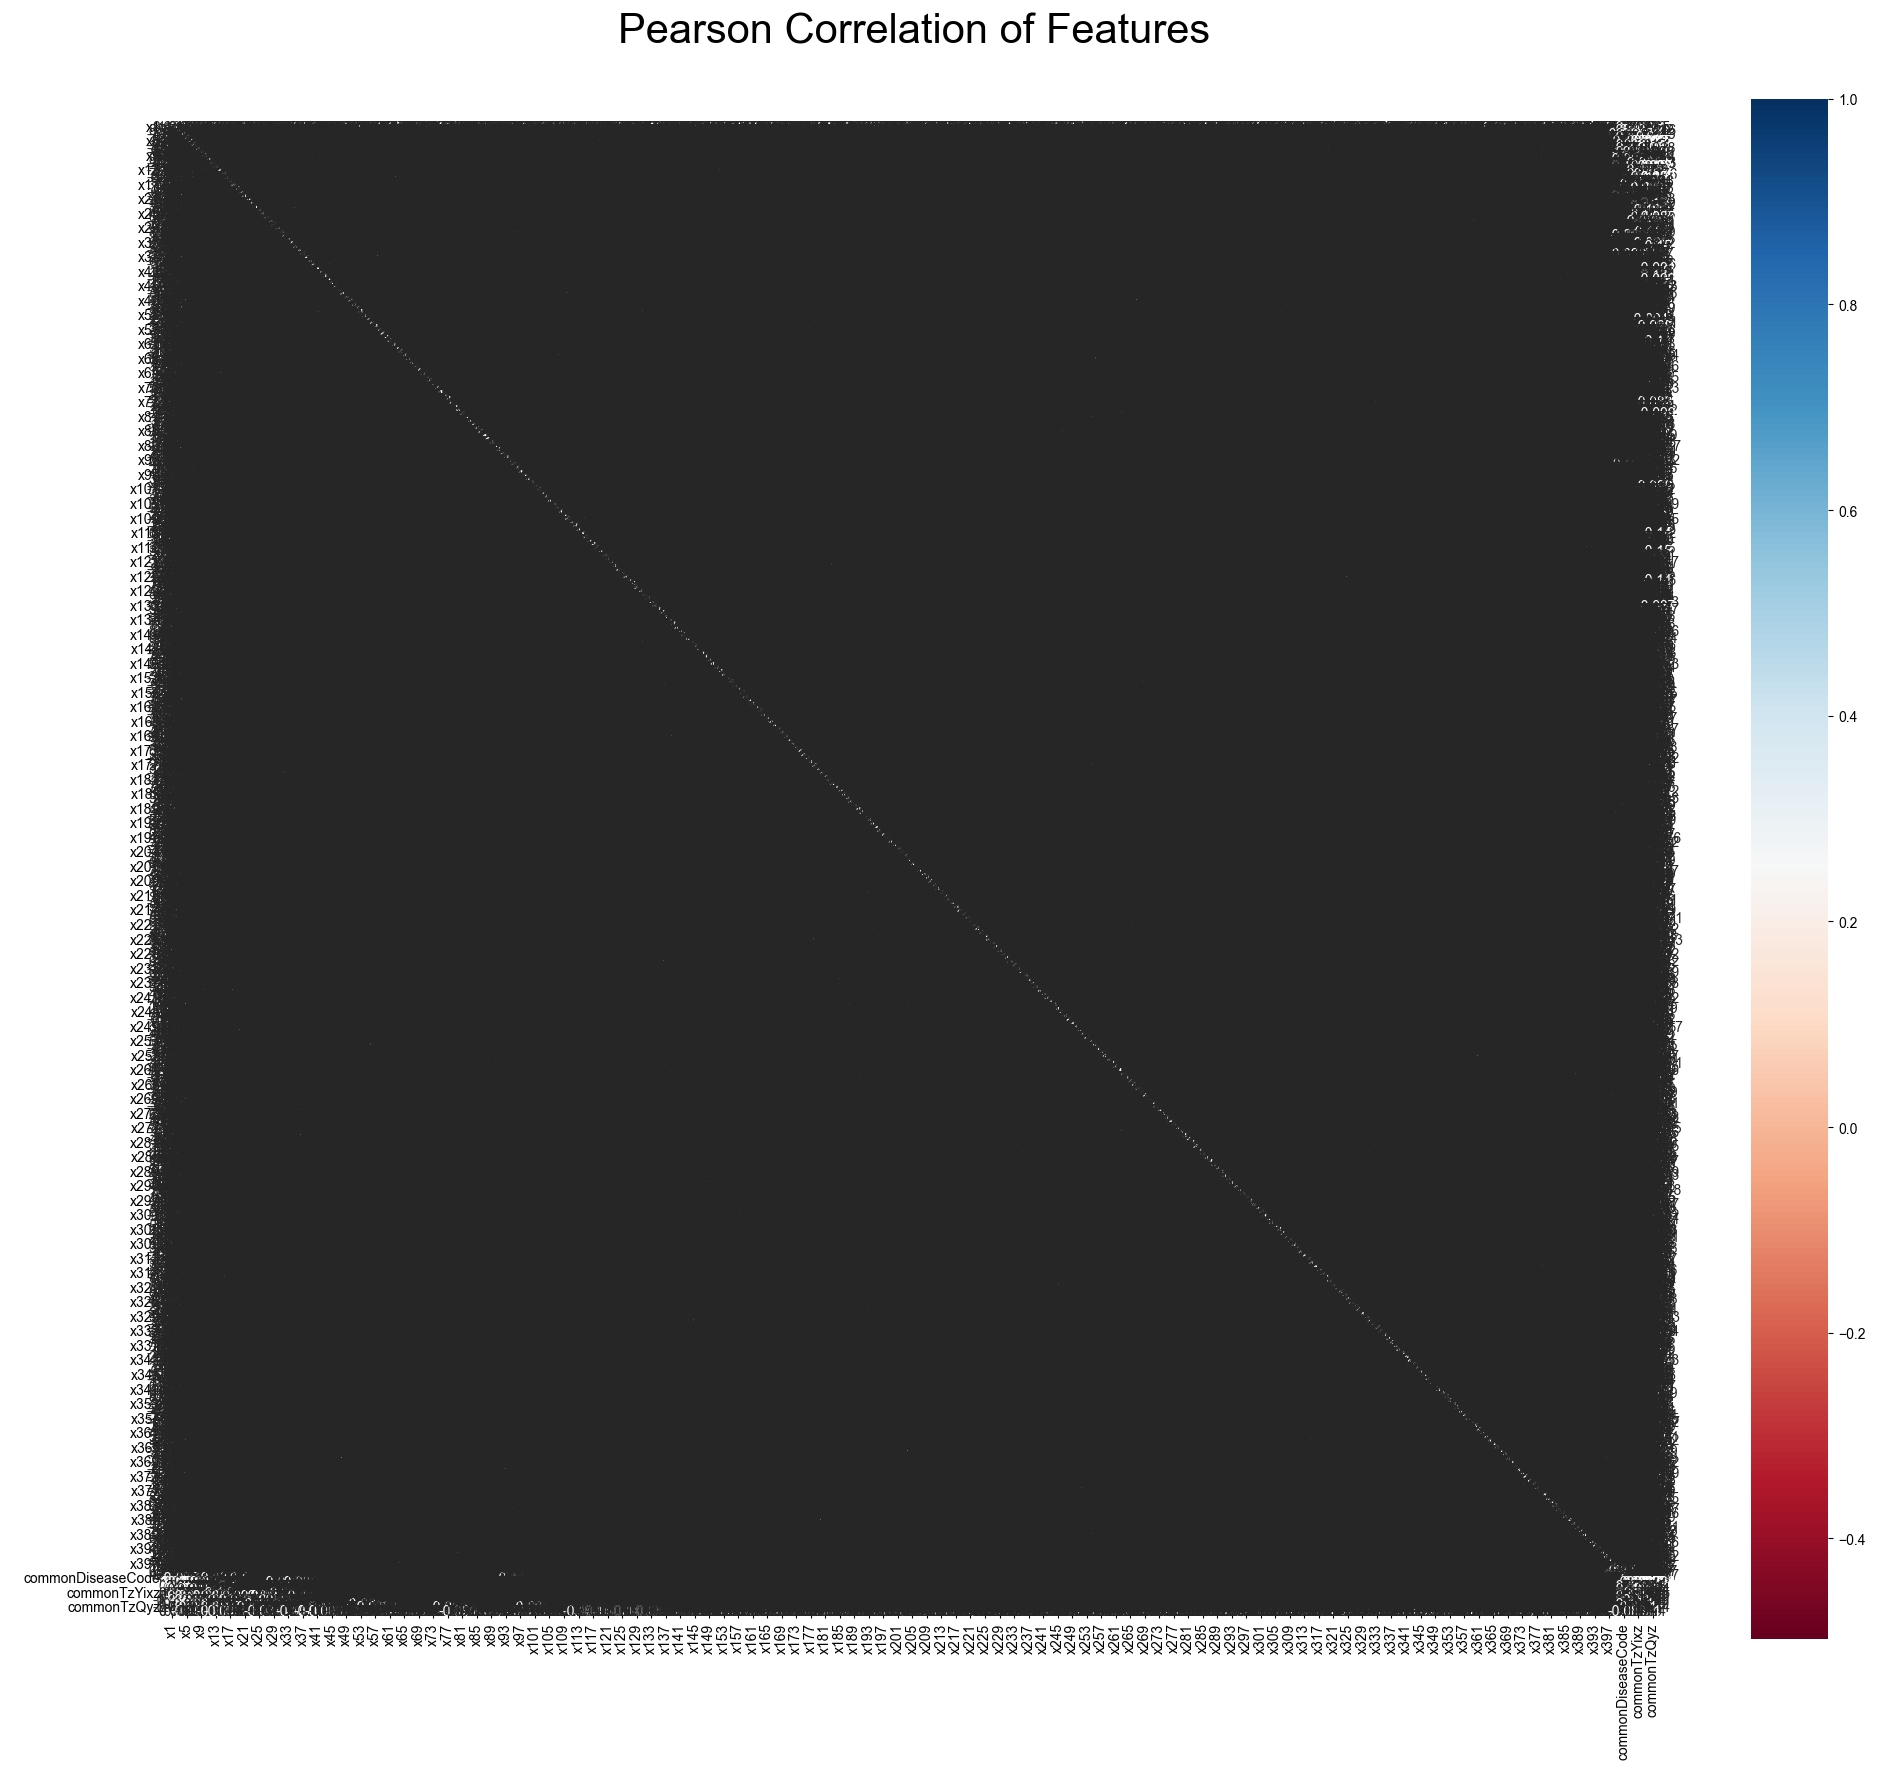

In [8]:
# 再次制作热图
'''
colormap = plt.cm.RdBu
plt.figure(figsize=(24,20))
plt.title('Pearson Correlation of Features',y=1.05,size=30)
sns.heatmap(train_df.astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True,cmap=colormap,linecolor='white',annot=True)
sns.set(font_scale=0.6)
plt.show()
'''
#降维后我们可以明显看出各特征x和标签y的相关性，而x之间及y之间相对独立

In [9]:
# 使用逻辑回归计算各特征对应每个标签的相关性并排序
logreg = LogisticRegression()
logreg.fit(x_train,y_train['commonDiseaseCode'])
coeff_df = pd.DataFrame(x_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation_y0"] = pd.Series(logreg.coef_[0])
coeff_df["abs"] = abs(coeff_df["Correlation_y0"])
coeff_df.sort_values(by=['abs'],ascending=False,inplace=True)
print(coeff_df.to_string(index=False))
#标准化相关系数:超过0.1的共有398个字段，前50个大于0.62

            Feature  Correlation_y0      abs
         commonSsHs        1.409194 1.409194
        commonXbYs2        1.379987 1.379987
     ggjbZzGjhdsmcy       -1.320017 1.320017
         ggjbJzhjMt       -1.240481 1.240481
       commonTzDpt4        1.171614 1.171614
       commonTzYpf2        1.168342 1.168342
      commonSxMlys3       -1.128112 1.128112
   commonTzNsyhjbh2       -1.123149 1.123149
        commonDbYs3       -1.110721 1.110721
        commonMzChe        1.083196 1.083196
        commonSsQzs       -1.042144 1.042144
      commonTzJsjz4       -1.017144 1.017144
      commonTzMsha1        0.997876 0.997876
      commonTzFbfm2       -0.944944 0.944944
           commonSg       -0.925406 0.925406
       ggjbTtxzBtjz       -0.923651 0.923651
          commonMzF       -0.922779 0.922779
       ggjbTtxzTcja        0.893945 0.893945
         commonSxNs        0.893106 0.893106
       ggjbTtxzDwzj        0.884510 0.884510
            ggjbKy3       -0.870756 0.870756
         g

In [9]:
# 使用逻辑回归计算各特征对应每个标签的相关性并排序
logreg = LogisticRegression()
logreg.fit(x_train,y_train['commonDiseaseCode'])
coeff_df = pd.DataFrame(x_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation_y0"] = pd.Series(logreg.coef_[0])
coeff_df["abs"] = abs(coeff_df["Correlation_y0"])
coeff_df.sort_values(by=['abs'],ascending=False,inplace=True)
print(coeff_df.to_string(index=False))
#标准化相关系数:超过0.1的共有398个字段，前50个大于0.62

            Feature  Correlation_y0      abs
         commonSsHs        1.409194 1.409194
        commonXbYs2        1.379987 1.379987
     ggjbZzGjhdsmcy       -1.320017 1.320017
         ggjbJzhjMt       -1.240481 1.240481
       commonTzDpt4        1.171614 1.171614
       commonTzYpf2        1.168342 1.168342
      commonSxMlys3       -1.128112 1.128112
   commonTzNsyhjbh2       -1.123149 1.123149
        commonDbYs3       -1.110721 1.110721
        commonMzChe        1.083196 1.083196
        commonSsQzs       -1.042144 1.042144
      commonTzJsjz4       -1.017144 1.017144
      commonTzMsha1        0.997876 0.997876
      commonTzFbfm2       -0.944944 0.944944
           commonSg       -0.925406 0.925406
       ggjbTtxzBtjz       -0.923651 0.923651
          commonMzF       -0.922779 0.922779
       ggjbTtxzTcja        0.893945 0.893945
         commonSxNs        0.893106 0.893106
       ggjbTtxzDwzj        0.884510 0.884510
            ggjbKy3       -0.870756 0.870756
         g

In [10]:
# 读取训练模型
def read_model(name):
    f = open('./models/'+name+'.pickle','rb')
    s = f.read()
    model = pickle.loads(s)
    return model

In [11]:
def train_acc(name):
    model = read_model(name)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = round(accuracy_score(y_test,y_pred)*100,5)
    print(name,acc)
    #print(y_pred)
    return model, acc

In [12]:
#logreg,acc_logreg = train_acc('model_logreg')
#svc,acc_svc = train_acc('model_SVM')
#gaussian,acc_gaussian = train_acc('model_Gaussian')
#perceptron,acc_perceptron = train_acc('model_Perceptron')
#linear,acc_linear = train_acc('model_LinearSVM|')
# sgd,acc_sgd = train_acc('model_SGD')
# ---------由于我们是多标签任务，有一些方法不再适用-----------------
knn,acc_knn = train_acc('model_KNN')
decision,acc_decision = train_acc('model_DecisionTree')
forest,acc_forest = train_acc('model_RandomForest')
kfold,acc_kfold = train_acc('model_kFold')

model_KNN 57.39437
model_DecisionTree 49.64789
model_RandomForest 60.56338
model_kFold 45.77465


# 深度学习

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim

# 定义模型
class MultiLabelClassifier(nn.Module):
    def __init__(self, input_size, num_labels):
        super(MultiLabelClassifier, self).__init__()
        self.linear = nn.Linear(input_size, num_labels)
        
    def forward(self, x):
        return self.linear(x)


Epoch [1/200], Loss: 0.7054, Accuracy: 46.39%
Epoch [2/200], Loss: 0.6729, Accuracy: 59.82%
Epoch [3/200], Loss: 0.6429, Accuracy: 70.61%
Epoch [4/200], Loss: 0.6153, Accuracy: 77.73%
Epoch [5/200], Loss: 0.5901, Accuracy: 80.61%
Epoch [6/200], Loss: 0.5673, Accuracy: 81.49%
Epoch [7/200], Loss: 0.5466, Accuracy: 81.64%
Epoch [8/200], Loss: 0.5279, Accuracy: 81.77%
Epoch [9/200], Loss: 0.5111, Accuracy: 81.78%
Epoch [10/200], Loss: 0.4960, Accuracy: 81.77%
Epoch [11/200], Loss: 0.4825, Accuracy: 81.76%
Epoch [12/200], Loss: 0.4704, Accuracy: 81.76%
Epoch [13/200], Loss: 0.4596, Accuracy: 81.76%
Epoch [14/200], Loss: 0.4498, Accuracy: 81.76%
Epoch [15/200], Loss: 0.4410, Accuracy: 81.76%
Epoch [16/200], Loss: 0.4330, Accuracy: 81.76%
Epoch [17/200], Loss: 0.4257, Accuracy: 81.76%
Epoch [18/200], Loss: 0.4191, Accuracy: 81.79%
Epoch [19/200], Loss: 0.4130, Accuracy: 81.82%
Epoch [20/200], Loss: 0.4073, Accuracy: 81.95%
Epoch [21/200], Loss: 0.4021, Accuracy: 82.10%
Epoch [22/200], Loss: 

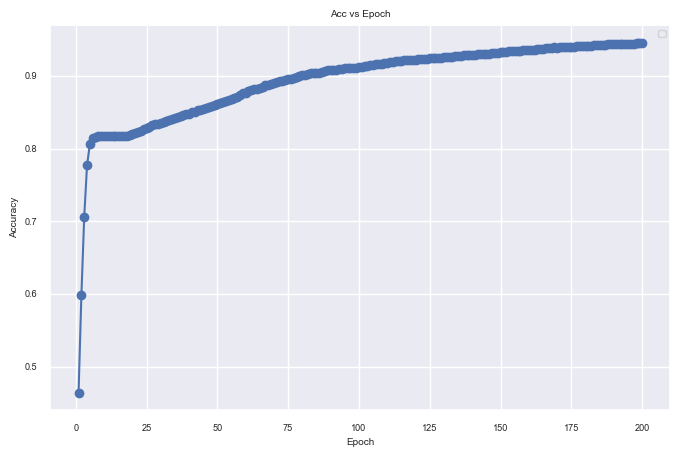

In [14]:
# 初始化模型
input_size = len(x_train.columns)  # 输入特征的维度
num_labels = len(y_train.columns)  # 标签的数量
model = MultiLabelClassifier(input_size, num_labels)

# 定义损失函数和优化器
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 转换数据为PyTorch张量
x_train_tensor = torch.Tensor(x_train.values)
y_train_tensor = torch.Tensor(y_train.values)

# 训练模型
num_epochs = 200
accuracies = []
losses = []

for epoch in range(num_epochs):
    # 前向传播
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    # 计算准确率
    predicted_labels = (torch.sigmoid(outputs) > 0.5).float()  # 使用阈值0.5确定标签
    accuracy = (predicted_labels == y_train_tensor).float().mean()
    accuracies.append(accuracy.item()) 
    losses.append(loss.item())
    
    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 打印损失和准确率
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy.item()*100:.2f}%')

# 模型训练完成，可以使用模型进行预测

# 绘制准确率曲线
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), accuracies, marker='o', linestyle='-')
plt.title('Acc vs Epoch')
plt.legend()  # 添加图例
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [15]:
# 保存训练完成的模型
torch.save(model.state_dict(), './models/trained_model.pth')
# 加载已保存的模型
#loaded_model = MultiLabelClassifier(input_size, num_labels)
#loaded_model.load_state_dict(torch.load('/models/trained_model.pth'))
#loaded_model.eval()  # 设置模型为评估模式

Epoch [1/200], Loss: 0.7004, Accuracy: 48.77%
Epoch [2/200], Loss: 0.6985, Accuracy: 49.84%
Epoch [3/200], Loss: 0.6965, Accuracy: 50.65%
Epoch [4/200], Loss: 0.6946, Accuracy: 51.85%
Epoch [5/200], Loss: 0.6926, Accuracy: 53.00%
Epoch [6/200], Loss: 0.6907, Accuracy: 54.21%
Epoch [7/200], Loss: 0.6888, Accuracy: 55.19%
Epoch [8/200], Loss: 0.6869, Accuracy: 56.06%
Epoch [9/200], Loss: 0.6850, Accuracy: 57.12%
Epoch [10/200], Loss: 0.6831, Accuracy: 58.00%
Epoch [11/200], Loss: 0.6813, Accuracy: 58.89%
Epoch [12/200], Loss: 0.6794, Accuracy: 59.55%
Epoch [13/200], Loss: 0.6776, Accuracy: 60.25%
Epoch [14/200], Loss: 0.6758, Accuracy: 60.96%
Epoch [15/200], Loss: 0.6740, Accuracy: 61.51%
Epoch [16/200], Loss: 0.6722, Accuracy: 62.25%
Epoch [17/200], Loss: 0.6704, Accuracy: 62.88%
Epoch [18/200], Loss: 0.6686, Accuracy: 63.61%
Epoch [19/200], Loss: 0.6669, Accuracy: 64.29%
Epoch [20/200], Loss: 0.6651, Accuracy: 65.07%
Epoch [21/200], Loss: 0.6634, Accuracy: 65.64%
Epoch [22/200], Loss: 

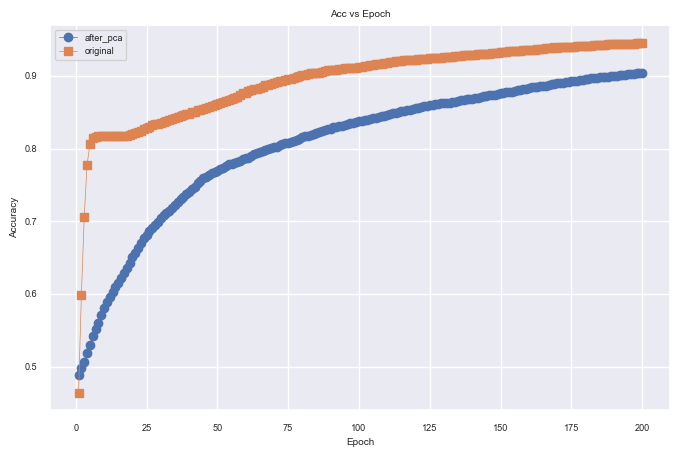

In [16]:
# 对数据降维后进行测试
input_size = len(pca_x_train.columns)  # 输入特征的维度
num_labels = len(y_train.columns)  # 标签的数量
model = MultiLabelClassifier(input_size, num_labels)
num_epochs = 200
learn_rating = 0.001
pca_accuracies = []
pca_losses = []

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learn_rating)
x_train_tensor = torch.Tensor(pca_x_train.values)
y_train_tensor = torch.Tensor(y_train.values)

for epoch in range(num_epochs):
    # 前向传播
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    # 计算准确率
    predicted_labels = (torch.sigmoid(outputs) > 0.5).float()  # 使用阈值0.5确定标签
    accuracy = (predicted_labels == y_train_tensor).float().mean()
    pca_accuracies.append(accuracy.item()) 
    pca_losses.append(loss.item())
    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 打印损失和准确率
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy.item()*100:.2f}%')

# 模型训练完成，可以使用模型进行预测

# 绘制准确率曲线
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), pca_accuracies, marker='o', linestyle='-',label='after_pca', linewidth=0.5)
plt.plot(range(1, num_epochs + 1), accuracies, marker='s', linestyle='-',label='original', linewidth=0.5)
plt.title('Acc vs Epoch')
plt.legend()  # 添加图例
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Epoch [1/200], Loss: 0.4687, Accuracy: 90.55%
Epoch [2/200], Loss: 0.4680, Accuracy: 90.64%
Epoch [3/200], Loss: 0.4673, Accuracy: 90.74%
Epoch [4/200], Loss: 0.4666, Accuracy: 90.77%
Epoch [5/200], Loss: 0.4659, Accuracy: 90.81%
Epoch [6/200], Loss: 0.4651, Accuracy: 90.87%
Epoch [7/200], Loss: 0.4644, Accuracy: 90.96%
Epoch [8/200], Loss: 0.4637, Accuracy: 90.99%
Epoch [9/200], Loss: 0.4630, Accuracy: 91.01%
Epoch [10/200], Loss: 0.4623, Accuracy: 91.07%
Epoch [11/200], Loss: 0.4616, Accuracy: 91.11%
Epoch [12/200], Loss: 0.4609, Accuracy: 91.15%
Epoch [13/200], Loss: 0.4602, Accuracy: 91.20%
Epoch [14/200], Loss: 0.4595, Accuracy: 91.21%
Epoch [15/200], Loss: 0.4588, Accuracy: 91.28%
Epoch [16/200], Loss: 0.4581, Accuracy: 91.33%
Epoch [17/200], Loss: 0.4574, Accuracy: 91.35%
Epoch [18/200], Loss: 0.4567, Accuracy: 91.38%
Epoch [19/200], Loss: 0.4561, Accuracy: 91.41%
Epoch [20/200], Loss: 0.4554, Accuracy: 91.44%
Epoch [21/200], Loss: 0.4547, Accuracy: 91.48%
Epoch [22/200], Loss: 

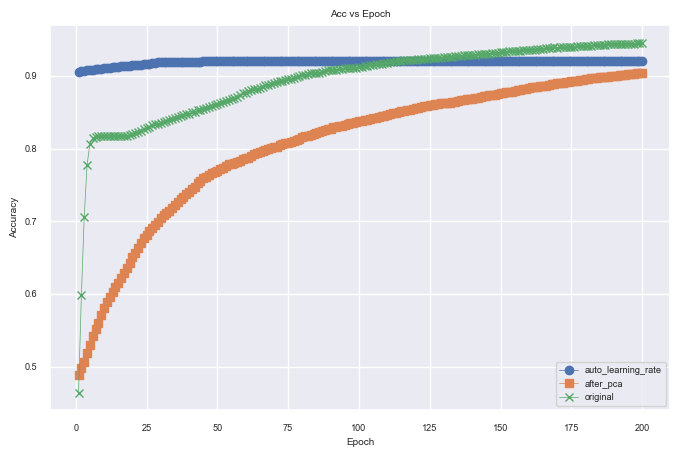

In [17]:
# 对学习率进行自动调整
from torch.optim import lr_scheduler
# 初始化一个学习率调度器
scheduler = lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
accuracies_auto = []
losses_auto = []
for epoch in range(num_epochs):
    # 前向传播
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    # 计算准确率
    predicted_labels = (torch.sigmoid(outputs) > 0.5).float()  # 使用阈值0.5确定标签
    accuracy = (predicted_labels == y_train_tensor).float().mean()
    accuracies_auto.append(accuracy.item()) 
    losses_auto.append(loss.item())
    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # 使用学习率调度器更新学习率
    scheduler.step()
    # 打印损失和准确率
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy.item()*100:.2f}%')

# 绘制准确率曲线
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), accuracies_auto, marker='o', linestyle='-',label='auto_learning_rate', linewidth=0.5)
plt.plot(range(1, num_epochs + 1), pca_accuracies, marker='s', linestyle='-',label='after_pca', linewidth=0.5)
plt.plot(range(1, num_epochs + 1), accuracies, marker='x', linestyle='-',label='original', linewidth=0.5)
plt.title('Acc vs Epoch')
plt.legend()  # 添加图例
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

Epoch [1/200], Loss: 0.6619, Accuracy: 62.81%
Epoch [2/200], Loss: 0.6307, Accuracy: 71.15%
Epoch [3/200], Loss: 0.6021, Accuracy: 77.20%
Epoch [4/200], Loss: 0.5761, Accuracy: 79.74%
Epoch [5/200], Loss: 0.5527, Accuracy: 81.07%
Epoch [6/200], Loss: 0.5317, Accuracy: 81.75%
Epoch [7/200], Loss: 0.5130, Accuracy: 81.81%
Epoch [8/200], Loss: 0.4964, Accuracy: 81.83%
Epoch [9/200], Loss: 0.4818, Accuracy: 81.84%
Epoch [10/200], Loss: 0.4690, Accuracy: 81.80%
Epoch [11/200], Loss: 0.4576, Accuracy: 81.79%
Epoch [12/200], Loss: 0.4486, Accuracy: 81.78%
Epoch [13/200], Loss: 0.4405, Accuracy: 81.79%
Epoch [14/200], Loss: 0.4332, Accuracy: 81.79%
Epoch [15/200], Loss: 0.4265, Accuracy: 81.80%
Epoch [16/200], Loss: 0.4204, Accuracy: 81.81%
Epoch [17/200], Loss: 0.4148, Accuracy: 81.81%
Epoch [18/200], Loss: 0.4096, Accuracy: 81.83%
Epoch [19/200], Loss: 0.4047, Accuracy: 81.88%
Epoch [20/200], Loss: 0.4001, Accuracy: 81.89%
Epoch [21/200], Loss: 0.3957, Accuracy: 81.93%
Epoch [22/200], Loss: 

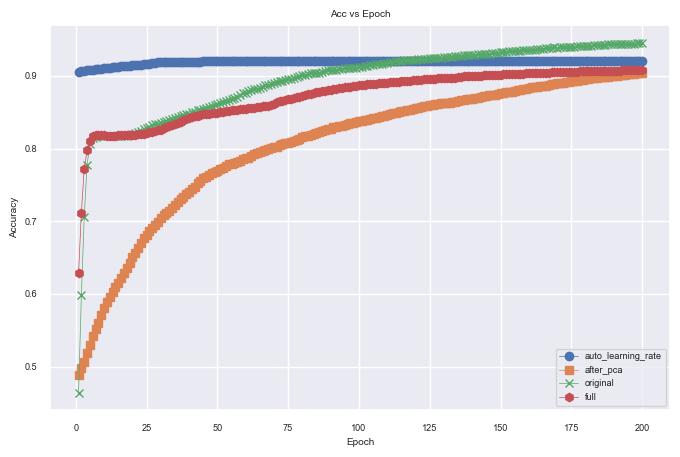

In [18]:
# 初始化模型

x_train_tensor = torch.Tensor(x_train.values)
y_train_tensor = torch.Tensor(y_train.values)
input_size = len(x_train.columns)  # 输入特征的维度
num_labels = len(y_train.columns)  # 标签的数量
model = MultiLabelClassifier(input_size, num_labels)

# 定义损失函数和优化器
criterion = nn.BCEWithLogitsLoss()

# 使用学习率调度器，初始学习率为0.001，每10个epochs乘以0.9
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.9)

# 训练模型
num_epochs = 200
accuracies_full = []
losses_full = []

for epoch in range(num_epochs):
    # 前向传播
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    # 计算准确率
    predicted_labels = (torch.sigmoid(outputs) > 0.5).float()  # 使用阈值0.5确定标签
    accuracy = (predicted_labels == y_train_tensor).float().mean()
    accuracies_full.append(accuracy.item()) 
    losses_full.append(loss.item())
    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 使用学习率调度器更新学习率
    scheduler.step()
    
    # 打印损失和准确率
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy.item()*100:.2f}%')

# 绘制准确率曲线
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), accuracies_auto, marker='o', linestyle='-',label='auto_learning_rate', linewidth=0.5)
plt.plot(range(1, num_epochs + 1), pca_accuracies, marker='s', linestyle='-',label='after_pca', linewidth=0.5)
plt.plot(range(1, num_epochs + 1), accuracies, marker='x', linestyle='-',label='original', linewidth=0.5)
plt.plot(range(1, num_epochs + 1), accuracies_full, marker='h', linestyle='-',label='full', linewidth=0.5)
plt.title('Acc vs Epoch')
plt.legend()  # 添加图例
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

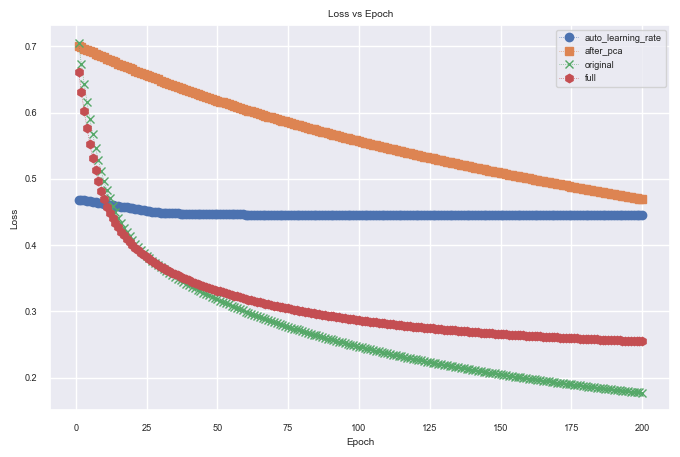

In [19]:
# 做一张损失的图
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), losses_auto, marker='o', linestyle='dotted',label='auto_learning_rate', linewidth=0.5)
plt.plot(range(1, num_epochs + 1), pca_losses, marker='s', linestyle='dotted',label='after_pca', linewidth=0.5)
plt.plot(range(1, num_epochs + 1), losses, marker='x', linestyle='dotted',label='original', linewidth=0.5)
plt.plot(range(1, num_epochs + 1), losses_full, marker='h', linestyle='dotted',label='full', linewidth=0.5)
plt.title('Loss vs Epoch')
plt.legend()  # 添加图例
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()